### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

> 自变量是文字对颜色的描述和文字的颜色是否一致，因变量是完成任务所需的时间。

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

> 零假设是文字描述和文字颜色一致情况下，完成任务所需平均时间与不一致情况下的平均时间是相同的。而备择假设则是两个平均时间是不相同的。一致情况下的平均时间用$μ_{0}$表示，不一致情况下的平均时间用$μ_{1}$表示。<br/>
$H_{0}$：$μ_{0}$ = $μ_{1}$<br/>
$H_{A}$：$μ_{0}$ ≠ $μ_{1}$<br/>
由于我们没有总体数据，只有样本数据，因此采用t检验。由于我们的假设集只关心平均时间的变化，不关心是增加还是减少，因此采用双尾检验。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 
%matplotlib inline

In [3]:
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
df.isnull().sum()

Congruent      0
Incongruent    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(24, 2)

In [7]:
df.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [8]:
df.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

> 数据集中没有空值和重复数据。共24个样本。一致任务的平均时间为14.05秒，标准差为3.56秒；不一致任务的平均时间为22.02秒，方差为4.8秒。

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

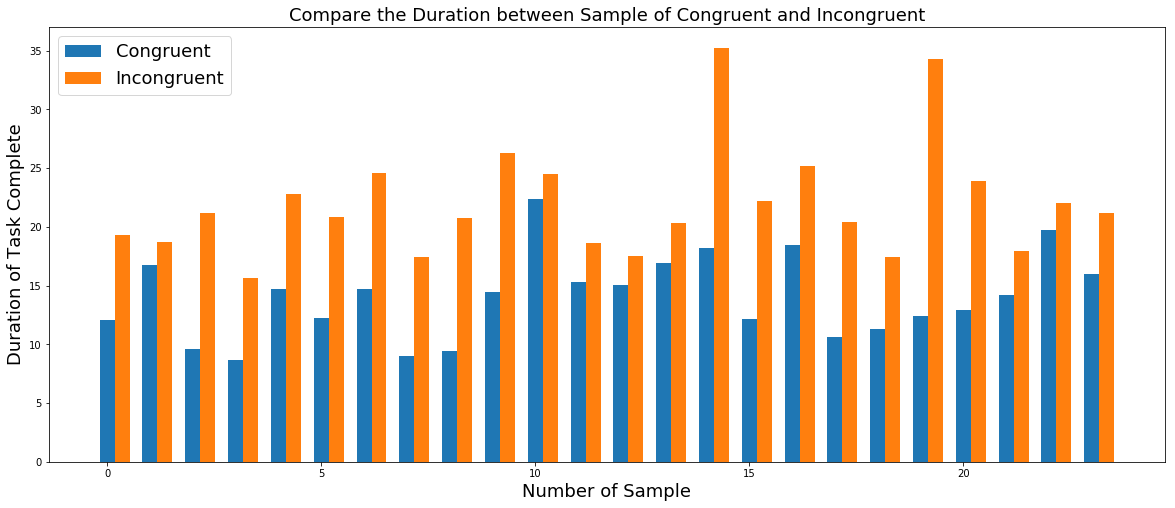

In [9]:
plt.figure(figsize=(20,8))
plt.bar(df.index,height=df['Congruent'],width=0.35,label='Congruent')
plt.bar(df.index+0.35,height=df['Incongruent'],width=0.35,label='Incongruent')
plt.legend(loc='upper left',fontsize=18);
plt.title('Compare the Duration between Sample of Congruent and Incongruent',fontsize=18)
plt.xlabel('Number of Sample',fontsize=18)
plt.ylabel('Duration of Task Complete',fontsize=18);

> 所有样本的不一致任务的时间都高于一致任务的时间。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [10]:
stats.ttest_rel(df['Congruent'],df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

置信水平设为95%。由于p<0.05，因此拒绝零假设。
### 总结
实验结果与自己的期望一致，不一致任务理论上确实会增加任务难度，会增加完成任务的时间。

## 参考资料
1. [项目中所使用的数据集](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md)
2. [scipy.stats函数官方文档](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)